## **Customer Churn Prediction**

Customer churn is defined as users who have left within the last month.

Dataset Used - Kaggle Telco Customer Churn
[https://www.kaggle.com/datasets/blastchar/telco-customer-churn]

In [ ]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # To handle categorical values
from imblearn.over_sampling import SMOTE # To handle class imbalance
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [ ]:
# loading the dataset
customer_data = pd.read_csv("telco.csv")

In [ ]:
customer_data.shape

(7043, 21)

In [ ]:
pd.set_option('display.max_columns', None) # To ensure all the features are displayed.
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*   We dont need the customerID column, can be removed.
*   Tenure is in months.

In [ ]:
customer_data.info()

# There are 19 independent features used to predict the target - Churn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We observe that the TotalCharges is an Object, which should be converted to a float value.

In [ ]:
# Dropping the customer ID column since it is not required.
df = customer_data.drop(columns = ['customerID'], axis = 1)

In [ ]:
# Printing the unique values in all the catergorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in df.columns:
    if col not in numerical_cols:
        print(col,":", df[col].unique())
        print('----'*50)

gender : ['Female' 'Male']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SeniorCitizen : [0 1]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Partner : ['Yes' 'No']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dependents : ['No' 'Yes']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
PhoneService : ['No' 'Yes']
----------------------------------------------------------------------

In [ ]:
# Checking for null values in the dataset

print(customer_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
# Replacing the missing values by 0

df["TotalCharges"] = df["TotalCharges"].replace(" ", "0.0") # They have not used the service for more than one month, hence charge is 0.0
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
customer_data.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


*   We can see that there is a imbalance in the samples. We find that there are more samples for the class 'no' than the 'yes' class. Only around 27% of the customers in the dataset have churned. We are dealing with an imbalanced classification problem through upsampling/ downsampling.

### Exploratory Data Analysis

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Observation**:
*   SeniorCitizen	- We can observe that the mean is 0.16, which means we dont have many samples where the customer is a senior citizen.

**Analysis of the continuous numerical features**

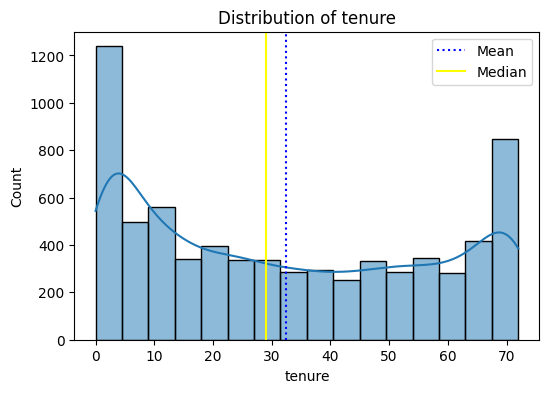

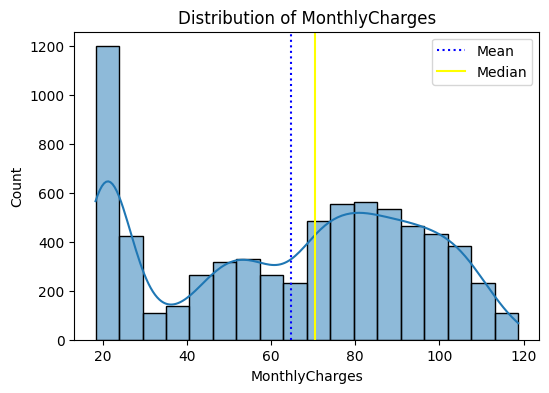

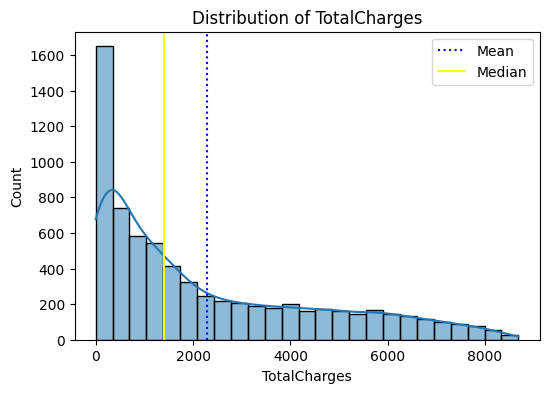

In [ ]:
def plt_hist(dataset, column_name):
    plt.figure(figsize = (6, 4))
    sns.histplot( dataset[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")

    # Calculating the mean and median of each feature
    feature_mean = dataset[column_name].mean()
    feature_median = dataset[column_name].median()

    # Plotting a line for the mean and median
    plt.axvline(feature_mean, color = 'blue', linestyle = 'dotted', label = "Mean")
    plt.axvline(feature_median, color = 'yellow', linestyle = '-', label = "Median")

    plt.legend()
    plt.show()


num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_features:
    plt_hist(df, col)

The feature 'TotalCharges' is skewed. Hence we have to scale the samples

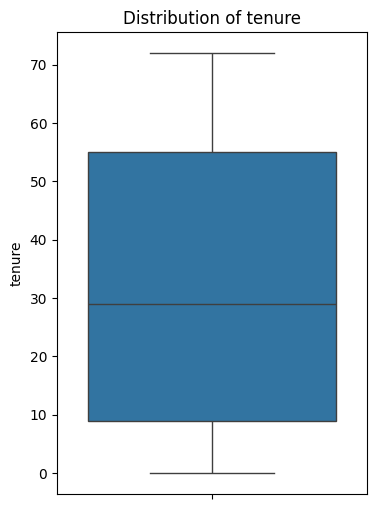

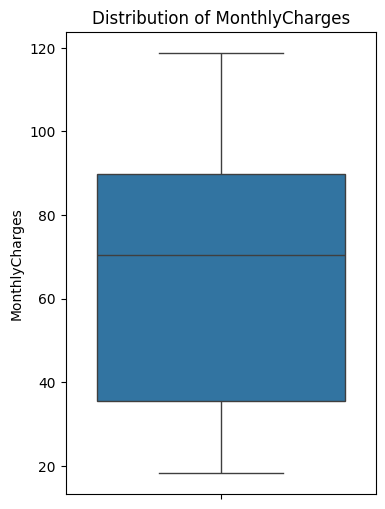

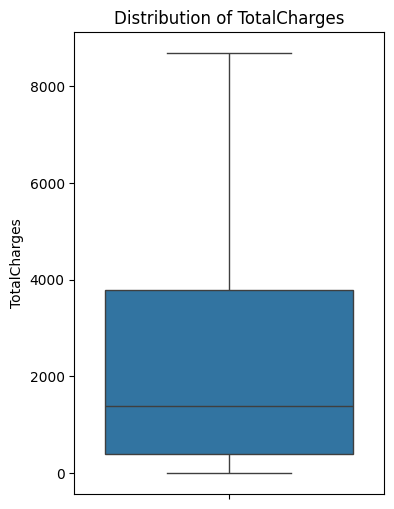

In [ ]:
def plt_box(dataset, column_name):
    plt.figure(figsize = (4, 6))
    sns.boxplot(y = dataset[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

for col in num_features:
    plt_box(df, col)

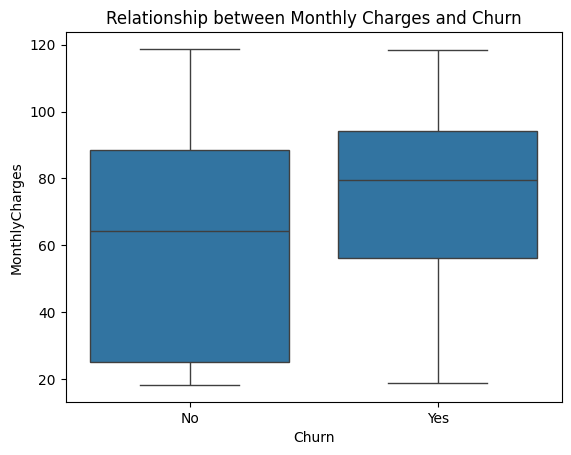

In [ ]:
# Visualising the relationship between the monthly charges and churn

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = customer_data)
plt.title('Relationship between Monthly Charges and Churn')
plt.show()

Insight: Customers with higher monthly charges are more likely to leave, indicating that the cost is a potential driver of churn.

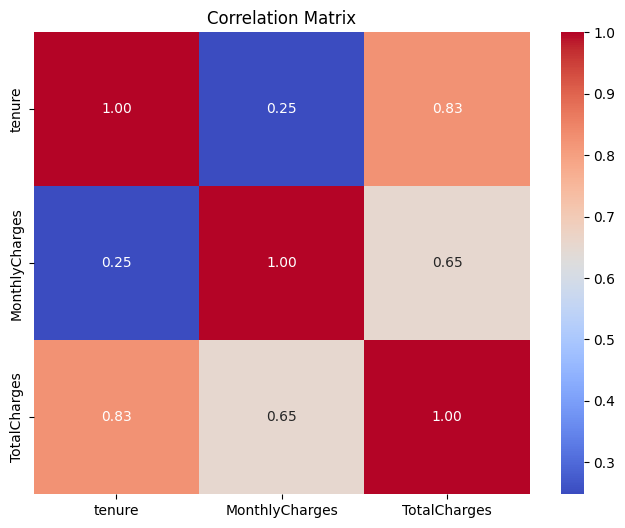

In [ ]:
# Correlation matrix for numerical features

plt.figure(figsize = (8, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

We can observe that the correlation between Tenure and Total Charges are high(0.83). We could consider drop one of the columns.

**Analysing the categorical features**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


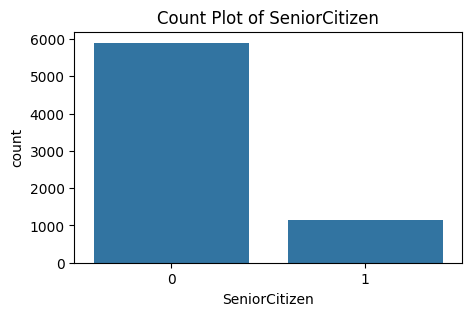

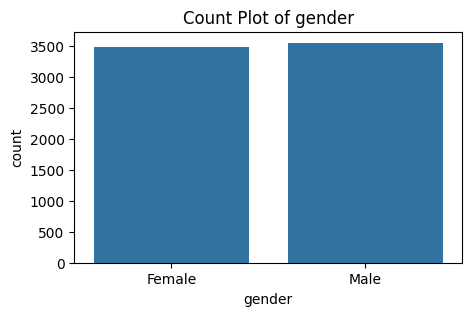

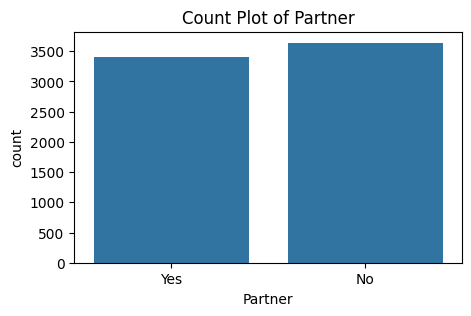

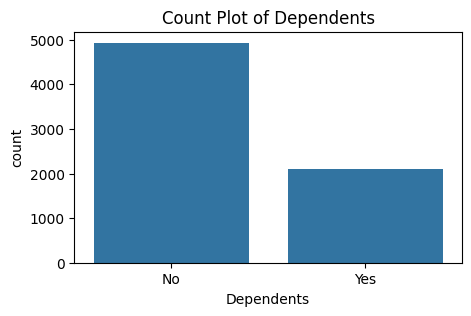

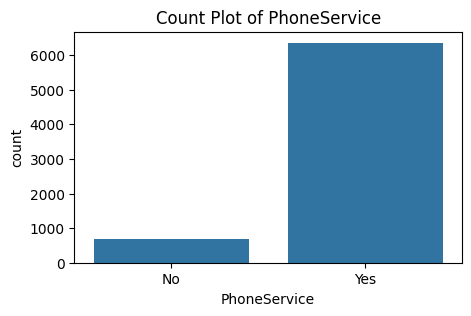

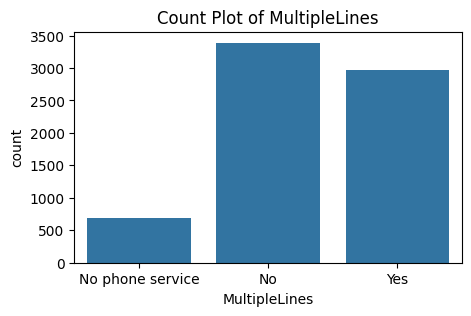

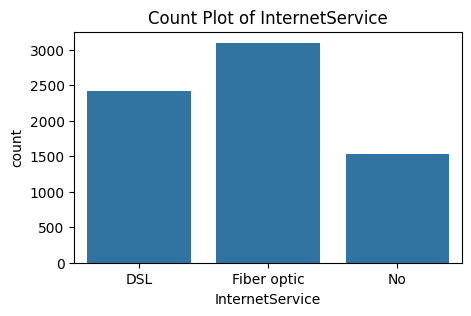

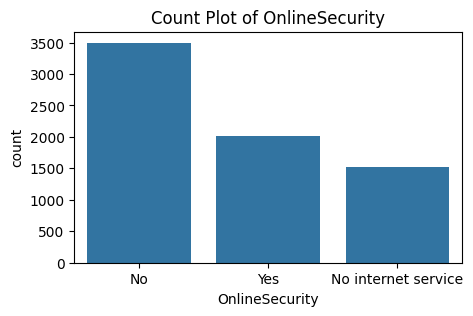

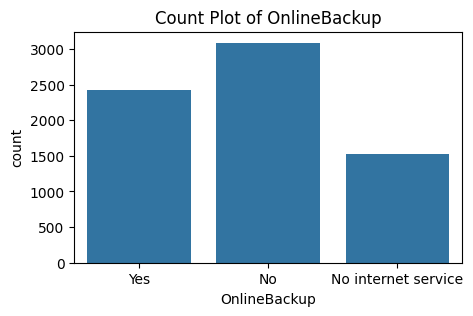

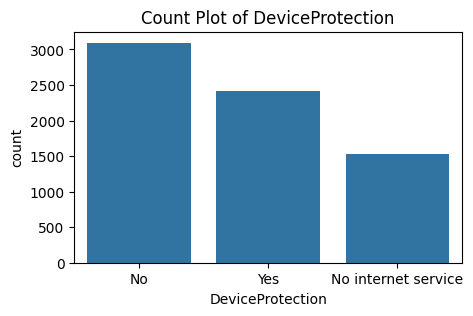

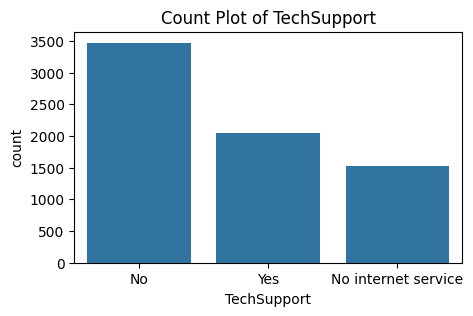

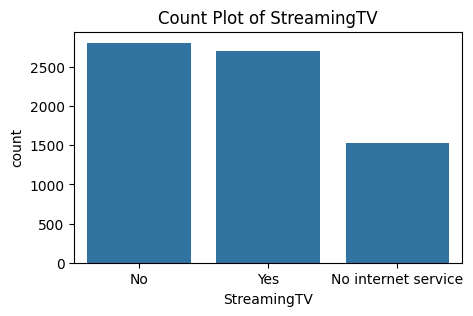

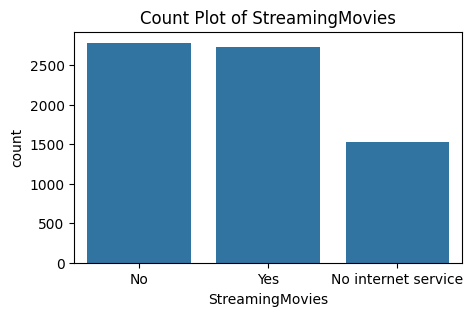

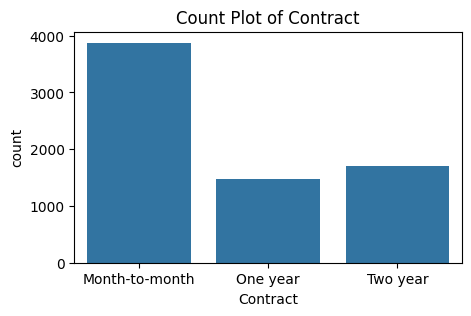

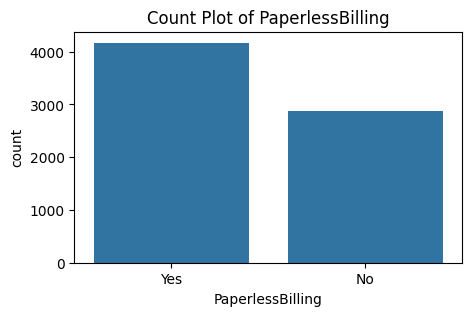

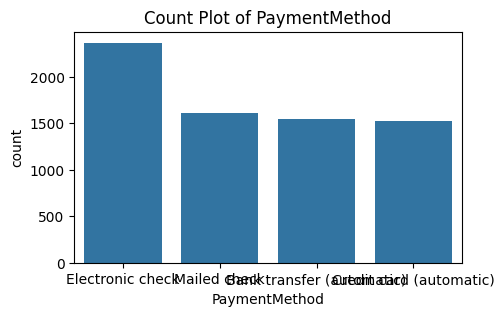

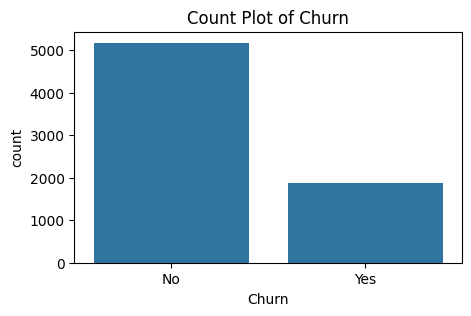

In [ ]:
# Creating a list of categorical features
categorical_cols = df.select_dtypes(include = "object").columns.to_list()

# Handling the 'SeniorCitizen' column
categorical_cols = ['SeniorCitizen'] + categorical_cols

# Plotting countplot for each feature
for col in categorical_cols:
    plt.figure(figsize = (5, 3))
    sns.countplot(x = col, data = df) # creating a count plot
    plt.title(f"Count Plot of {col}") # # Adding title to the plot
    plt.show()

### **Data Preprocessing**

In [ ]:
# Label encoding of target

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


<ipython-input-22-8bc686636493>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


**Label encoding of other categorical features**

In [ ]:
# Identifying the feature with the Object datatype
obj_cols = df.select_dtypes(include = "object").columns
print(obj_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# Initialize a dictionary to save all the encoders as pickle file

encoder = {}

# Applying label encoding for each of the categorical feature
for col in obj_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoder[col] = label_encoder
    print(f"{col} has been label encoded")

# Saving the encoders to a pickle file
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

gender has been label encoded
Partner has been label encoded
Dependents has been label encoded
PhoneService has been label encoded
MultipleLines has been label encoded
InternetService has been label encoded
OnlineSecurity has been label encoded
OnlineBackup has been label encoded
DeviceProtection has been label encoded
TechSupport has been label encoded
StreamingTV has been label encoded
StreamingMovies has been label encoded
Contract has been label encoded
PaperlessBilling has been label encoded
PaymentMethod has been label encoded


In [ ]:
encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting the dataset into Training and Testing sets

In [ ]:
# Splitting the features and target
X = df.drop(columns = ['Churn'], axis = 1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [ ]:
print("Imbalance in the Training data:", y_train.value_counts())
print("\nImbalance in the Testing data:", y_test.value_counts())

Imbalance in the Training data: Churn
0    4138
1    1496
Name: count, dtype: int64

Imbalance in the Testing data: Churn
0    1036
1     373
Name: count, dtype: int64


Performing SMOTE (Synthetic Minority Oversampling TEchnique)

In [ ]:
# Using SMOTE to handle the imbalance in the dataset

smote = SMOTE(random_state = 42)

# Performing SMOTE on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())  # We have handled the imbalance in the data

Churn
0    4138
1    4138
Name: count, dtype: int64


### Model Training

In [ ]:
!pip install scikeras

In [ ]:
# Training with default hyperparameters
from sklearn.linear_model import LogisticRegression

# Dictionary of models
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "KNN" : KNeighborsClassifier(),
    "Support Vector Machine" : SVC(random_state = 42),
    "Logistic Regression" : LogisticRegression(max_iter=10000, random_state = 42),
}

In [ ]:
for model_name, model in models.items():
    print(model_name)
    print(model)
    print("-"*50)

Decision Tree
DecisionTreeClassifier(random_state=42)
--------------------------------------------------
Random Forest
RandomForestClassifier(random_state=42)
--------------------------------------------------
KNN
KNeighborsClassifier()
--------------------------------------------------
Support Vector Machine
SVC(random_state=42)
--------------------------------------------------
Logistic Regression
LogisticRegression(max_iter=10000, random_state=42)
--------------------------------------------------


In [ ]:
# Dictionary to store all the cross validation results

cv_results = {}

# Performing 5 - fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default hyperparameters")
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv = 5, scoring = "accuracy")
    cv_results[model_name] = scores
    print(f"{model_name} cross validation result: {np.mean(scores):.2f}")
    print("***"*20)

Training Decision Tree with default hyperparameters
Decision Tree cross validation result: 0.78
************************************************************
Training Random Forest with default hyperparameters
Random Forest cross validation result: 0.84
************************************************************
Training KNN with default hyperparameters
KNN cross validation result: 0.77
************************************************************
Training Support Vector Machine with default hyperparameters
Support Vector Machine cross validation result: 0.64
************************************************************
Training Logistic Regression with default hyperparameters
Logistic Regression cross validation result: 0.79
************************************************************


In [ ]:
cv_results

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'KNN': array([0.75060386, 0.75951662, 0.78247734, 0.78731118, 0.77462236]),
 'Support Vector Machine': array([0.65519324, 0.65740181, 0.61510574, 0.61993958, 0.65015106]),
 'Logistic Regression': array([0.73007246, 0.74803625, 0.82779456, 0.81993958, 0.83625378])}

We observe that Random forest performs better than the other models on the dataset.

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts()) # We observe a imbalance in the target classes.

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Since there is imbalance in the test data, the accuracy is not highly reliable.

Accuracy Score:  0.7785663591199432


In [ ]:
confusion_matrix(y_test, y_pred)

array([[878, 158],
       [154, 219]])

Out of 1036 samples from class 0, the model that predicted class 0 878 times while class 1 has been predicted correctly 219 times out of 373 times.

In [ ]:
print(classification_report(y_test, y_pred))

# We see a clear difference between the performance scores of class 1 and 0 because of the class imbalance.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# Saving the model and feature names as a pickle file

model_data = {"model": rfc, "feature_names": X.columns.tolist()}

with open("customer_churn.pkl", "wb") as f:
    pickle.dump(model_data, f)

### Building a predictive System

In [ ]:
with open("customer_churn.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

input_df = pd.DataFrame([input_data])

with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)

print(input_df)

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [ ]:
# Encoding the input data
for col, encoder in encoders.items():
    input_df[col] = encoder.transform(input_df[col])

ValueError: y contains previously unseen labels: 0

In [ ]:
input_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
# Making a prediction using the new input data
predicted_result = loaded_model.predict(input_df)
print("Predicted output:", predicted_result)

predicted_prob = loaded_model.predict_proba(input_df)
print("Prediction Probablility:", predicted_prob)

if predicted_result[0] == 1:
    print("Customer will churn")
else:
    print("Customer will not churn")

Predicted output: [0]
Prediction Probablility: [[0.78 0.22]]
Customer will not churn
